Predicting IDRL Dataset

In [390]:
idrl

,I1_z025,I1_z050,I1_y125,I1_y150,I1_y175,I1_z075,I2_z075,I3_z075,I4_z075,I5_z075,...,I95_z075,Est.STLE,p_mean,p_med,p_std,p_var,p_q1,p_q3,p_max,p_min
2152,6.954271,7.091257,7.247820,7.113580,7.110719,6.890042,6.912281,7.208522,7.096931,7.035995,...,21.945808,24.352679,8.963511,8.469819,2.627361,6.903025,7.584825,9.264459,21.945808,6.890042
2153,6.923579,7.087839,7.257635,7.087724,7.117243,6.886631,6.895090,7.194828,7.124069,7.012246,...,25.566223,23.353871,9.516271,8.465357,3.930882,15.451832,7.577978,9.300327,25.566223,6.886631
2154,6.886065,7.043405,7.195471,7.090956,7.081362,6.876395,6.867582,7.191404,7.124069,7.005461,...,29.069303,22.105950,10.496363,8.486814,5.704561,32.542020,7.564351,9.345553,29.069303,6.867582
2155,6.848552,7.046823,7.234733,7.071564,7.078100,6.913925,6.915720,7.239335,7.103715,6.988497,...,31.451757,20.627715,11.737188,8.593003,7.353198,54.069515,7.605122,9.751926,31.451757,6.848552
2156,6.906527,7.050240,7.244548,7.065100,7.100933,6.879807,6.884775,7.191404,7.134245,7.002068,...,31.907745,20.115385,12.095411,8.602455,7.736227,59.849206,7.590816,9.921560,31.907745,6.879807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,11.114364,11.393116,11.592338,11.438862,11.464869,11.032471,11.039554,11.624320,11.420302,11.286018,...,41.138736,22.402067,15.146593,13.462253,6.252376,39.092202,12.093513,14.624408,41.138736,11.032471
4196,11.121184,11.393116,11.664303,11.429163,11.393123,11.073422,11.022379,11.579826,11.420302,11.299583,...,39.420860,22.451419,14.937114,13.424858,5.655499,31.984669,12.144211,14.658052,39.420860,11.022379
4375,11.857625,11.889174,12.367591,12.376487,12.439930,12.042598,12.320576,12.589452,12.843768,13.062776,...,14.547205,5.474044,14.456023,14.713852,0.756642,0.572508,14.557581,14.847067,15.001857,11.857625
4376,12.522442,12.501598,12.619462,12.631915,12.746461,12.561321,12.918044,13.212308,13.460502,13.649306,...,14.528219,5.474044,14.494660,14.684112,0.584053,0.341118,14.573390,14.789135,14.958830,12.501598


In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [327]:
idrl = pd.read_csv('../data/idrl_estimated', index_col=0)

In [328]:
idrl = idrl.loc[idrl.notna()['Est.STLE']]

In [329]:
X = idrl.drop('Est.STLE',axis=1)
y = idrl['Est.STLE']

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)

Linear Regression

In [332]:
from sklearn.linear_model import LinearRegression

In [333]:
lin_reg = LinearRegression()

In [334]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [185]:
from sklearn.metrics import mean_squared_error

In [186]:
print('R2:'+str(lin_reg.score(X_test,y_test)))
print('MSE:'+str(mean_squared_error(y_test, lin_reg.predict(X_test))))

R2:0.8952783700799554
MSE:4.2625215184354355


Regularized Linear Regression

In [187]:
from sklearn.linear_model import Lasso, Ridge

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [190]:
las_reg = Lasso()

In [191]:
las_reg.fit(X_train_scaled, y_train)

Lasso()

In [192]:
print('R2:'+str(las_reg.score(X_test_scaled,y_test)))
print('MSE:'+str(mean_squared_error(y_test, las_reg.predict(X_test_scaled))))

R2:0.8657108274632882
MSE:5.466019656757259


In [193]:
rid_reg = Ridge()

In [194]:
rid_reg.fit(X_train_scaled, y_train)

Ridge()

In [195]:
print('R2:'+str(rid_reg.score(X_test_scaled,y_test)))
print('MSE:'+str(mean_squared_error(y_test, rid_reg.predict(X_test_scaled))))

R2:0.9467426595074573
MSE:2.167752354861451


Random Forest

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [208]:
rfr = RandomForestRegressor()

In [209]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [210]:
print('R2:'+str(rfr.score(X_test,y_test)))
print('MSE:'+str(mean_squared_error(y_test, rfr.predict(X_test))))

R2:0.9819490775678188
MSE:0.734733076189965


In [218]:
rfc = RandomForestRegressor(random_state=146)
param_grid = dict(n_estimators=[1,100,500],max_depth = [2,3,4,5],
                 min_samples_split = [2,3,4,5])
cv = KFold(n_splits=10,random_state=146,shuffle=True)
grid = GridSearchCV(rfc,param_grid,cv=cv,scoring='r2')

In [219]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=146, shuffle=True),
             estimator=RandomForestRegressor(random_state=146),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [1, 100, 500]},
             scoring='r2')

In [223]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1} with a score of 1.00


In [224]:
results = pd.DataFrame(grid.cv_results_)[['param_n_estimators','param_max_depth',
                                'param_min_samples_split','mean_test_score','rank_test_score']]

In [225]:
results[results['rank_test_score'] == 1]

,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
36,1,5,2,0.997771,1
39,1,5,3,0.997771,1
42,1,5,4,0.997771,1
45,1,5,5,0.997771,1


In [235]:
five_pressures = list(idrl.corr()['Est.STLE'].sort_values().head().index)

Random Forest with only 5 Highly Correlated Variables

In [275]:
rfr = RandomForestRegressor(n_estimators=1, max_depth=5, min_samples_split=2)

In [276]:
X = idrl[five_pressures]
y = idrl['Est.STLE']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)

In [278]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1)

In [279]:
rfr.score(X_test, y_test)

0.9676367161215476

In [280]:
mean_squared_error(y_test, rfr.predict(X_test))

1.3172941831068041

New Features

In [336]:
og_col = idrl.columns[:-1]

In [338]:
idrl['p_mean'] = idrl[og_col].mean(axis=1)
idrl['p_med'] = idrl[og_col].median(axis=1)
idrl['p_std'] = idrl[og_col].std(axis=1)
idrl['p_var'] = idrl[og_col].var(axis=1)
idrl['p_q1'] = idrl[og_col].quantile(0.25,axis=1)
idrl['p_q3'] = idrl[og_col].quantile(0.75,axis=1)
idrl['p_max'] = idrl[og_col].max(axis=1)
idrl['p_min'] = idrl[og_col].min(axis=1)

In [340]:
rfr = RandomForestRegressor(n_estimators=1, max_depth=5, min_samples_split=2)

In [341]:
X = idrl[['p_mean','p_med','p_std','p_var','p_q1','p_q3','p_max','p_min']]
y = idrl['Est.STLE']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)

In [343]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1)

In [344]:
print('R2:'+str(rfr.score(X_test,y_test)))
print('MSE:'+str(mean_squared_error(y_test, rfr.predict(X_test))))

R2:0.9850476108938276
MSE:0.608612378987425


In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import load_model

In [346]:
X = idrl[['p_mean','p_med','p_std','p_var','p_q1','p_q3','p_max','p_min']]
y = idrl['Est.STLE']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)

In [355]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')    
model.fit(x=X_train,y=y_train.values,
        validation_data=(X_test,y_test.values),
        batch_size=30,epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 16ms/step - loss: 340.9520 - val_loss: 141.1881
Epoch 2/300
5/5 [==============================] - 0s 6ms/step - loss: 117.1471 - val_loss: 118.4460
Epoch 3/300
5/5 [==============================] - 0s 6ms/step - loss: 128.8901 - val_loss: 174.6385
Epoch 4/300
5/5 [==============================] - 0s 6ms/step - loss: 133.7287 - val_loss: 117.3928
Epoch 5/300
5/5 [==============================] - 0s 6ms/step - loss: 98.6365 - val_loss: 86.8955
Epoch 6/300
5/5 [==============================] - 0s 6ms/step - loss: 92.4069 - val_loss: 84.3566
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 92.0518 - val_loss: 80.6602
Epoch 8/300
5/5 [==============================] - 0s 6ms/step - loss: 85.6486 - val_loss: 77.8223
Epoch 9/300
5/5 [==============================] - 0s 6ms/step - loss: 81.1774 - val_loss: 79.2648
Epoch 10/300
5/5 [==============================] - 0s 6ms/step - loss: 79.1539 - val_loss: 76.3108


Epoch 84/300
5/5 [==============================] - 0s 6ms/step - loss: 1.2800 - val_loss: 1.8793
Epoch 85/300
5/5 [==============================] - 0s 5ms/step - loss: 1.2482 - val_loss: 1.8607
Epoch 86/300
5/5 [==============================] - 0s 6ms/step - loss: 1.2299 - val_loss: 1.8462
Epoch 87/300
5/5 [==============================] - 0s 6ms/step - loss: 1.2111 - val_loss: 1.8208
Epoch 88/300
5/5 [==============================] - 0s 6ms/step - loss: 1.2161 - val_loss: 1.8025
Epoch 89/300
5/5 [==============================] - 0s 6ms/step - loss: 1.2014 - val_loss: 1.7873
Epoch 90/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1957 - val_loss: 1.7888
Epoch 91/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1558 - val_loss: 1.7635
Epoch 92/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1694 - val_loss: 1.7845
Epoch 93/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1615 - val_loss: 1.7674
Epoch 94/300
5/5 [==

Epoch 167/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5791 - val_loss: 1.2357
Epoch 168/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5484 - val_loss: 1.2513
Epoch 169/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5597 - val_loss: 1.2892
Epoch 170/300
5/5 [==============================] - 0s 6ms/step - loss: 0.6118 - val_loss: 1.2402
Epoch 171/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5977 - val_loss: 1.3506
Epoch 172/300
5/5 [==============================] - 0s 6ms/step - loss: 0.6218 - val_loss: 1.4274
Epoch 173/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5921 - val_loss: 1.2242
Epoch 174/300
5/5 [==============================] - 0s 6ms/step - loss: 0.6125 - val_loss: 1.4154
Epoch 175/300
5/5 [==============================] - 0s 6ms/step - loss: 0.7401 - val_loss: 1.6162
Epoch 176/300
5/5 [==============================] - 0s 6ms/step - loss: 0.7295 - val_loss: 1.4077
Epoch 177/

In [384]:
base_model = load_model('../code/no_time_aggregated_model_umich_use_for_transfer_learning_jul5/')

In [385]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [386]:
new_model = Sequential()

base_model.trainable = False
    
new_model.add(base_model)
new_model.add(Dense(20, activation='relu'))
new_model.add(Dense(30, activation='relu'))
new_model.add(Dense(10, activation='relu'))
new_model.add(Dense(1))
              
new_model.compile(optimizer='adam',loss='mse')

In [387]:
result = new_model.fit(x=X_train_scaled,y=y_train.values,
          validation_data=(X_test_scaled,y_test.values),
          batch_size=128,epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 57ms/step - loss: 8800.8242 - val_loss: 6275.5708
Epoch 2/300
2/2 [==============================] - 0s 15ms/step - loss: 6273.8408 - val_loss: 4226.9902
Epoch 3/300
2/2 [==============================] - 0s 17ms/step - loss: 4224.4482 - val_loss: 2631.5229
Epoch 4/300
2/2 [==============================] - 0s 16ms/step - loss: 2631.9209 - val_loss: 1465.2974
Epoch 5/300
2/2 [==============================] - 0s 18ms/step - loss: 1464.4387 - val_loss: 700.3030
Epoch 6/300
2/2 [==============================] - 0s 16ms/step - loss: 710.9039 - val_loss: 360.2366
Epoch 7/300
2/2 [==============================] - 0s 17ms/step - loss: 374.1739 - val_loss: 155.0966
Epoch 8/300
2/2 [==============================] - 0s 16ms/step - loss: 164.2881 - val_loss: 62.2179
Epoch 9/300
2/2 [==============================] - 0s 17ms/step - loss: 70.4987 - val_loss: 50.2333
Epoch 10/300
2/2 [==============================] - 0s 17ms/step - loss: 53.

Epoch 82/300
2/2 [==============================] - 0s 16ms/step - loss: 51.1745 - val_loss: 47.3469
Epoch 83/300
2/2 [==============================] - 0s 15ms/step - loss: 51.0836 - val_loss: 47.4768
Epoch 84/300
2/2 [==============================] - 0s 14ms/step - loss: 51.0349 - val_loss: 47.7588
Epoch 85/300
2/2 [==============================] - 0s 15ms/step - loss: 51.0952 - val_loss: 48.0491
Epoch 86/300
2/2 [==============================] - 0s 15ms/step - loss: 51.1736 - val_loss: 48.2228
Epoch 87/300
2/2 [==============================] - 0s 14ms/step - loss: 51.2699 - val_loss: 48.1589
Epoch 88/300
2/2 [==============================] - 0s 14ms/step - loss: 51.2429 - val_loss: 47.9553
Epoch 89/300
2/2 [==============================] - 0s 14ms/step - loss: 51.1309 - val_loss: 47.8172
Epoch 90/300
2/2 [==============================] - 0s 14ms/step - loss: 51.0619 - val_loss: 47.5910
Epoch 91/300
2/2 [==============================] - 0s 15ms/step - loss: 51.1135 - val_loss

2/2 [==============================] - 0s 14ms/step - loss: 50.9213 - val_loss: 47.9252
Epoch 243/300
2/2 [==============================] - 0s 14ms/step - loss: 51.1199 - val_loss: 48.1260
Epoch 244/300
2/2 [==============================] - 0s 14ms/step - loss: 51.1454 - val_loss: 48.0154
Epoch 245/300
2/2 [==============================] - 0s 15ms/step - loss: 51.0911 - val_loss: 48.0041
Epoch 246/300
2/2 [==============================] - 0s 14ms/step - loss: 51.0833 - val_loss: 47.8635
Epoch 247/300
2/2 [==============================] - 0s 14ms/step - loss: 50.9650 - val_loss: 47.4324
Epoch 248/300
2/2 [==============================] - 0s 14ms/step - loss: 51.0568 - val_loss: 47.2215
Epoch 249/300
2/2 [==============================] - 0s 14ms/step - loss: 51.0501 - val_loss: 47.1929
Epoch 250/300
2/2 [==============================] - 0s 14ms/step - loss: 51.1467 - val_loss: 47.1948
Epoch 251/300
2/2 [==============================] - 0s 14ms/step - loss: 51.3420 - val_loss: 47

<Axes: >

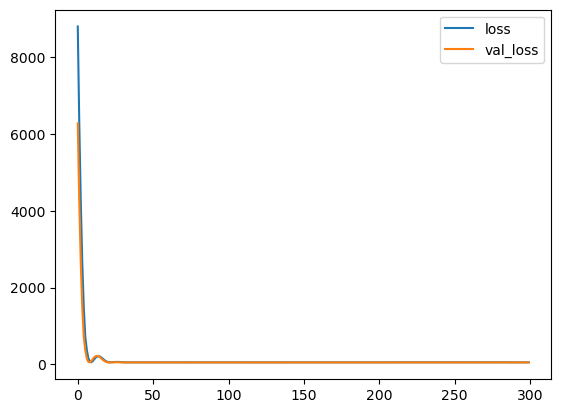

In [388]:
pd.DataFrame(result.history).plot()

In [389]:
mean_squared_error(y_test, new_model.predict(X_test_scaled))

42/42 [==============================] - 0s 380us/step


48.00333041624862